In [93]:
import cv2
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
%matplotlib inline
from einops import rearrange, repeat
from image_tools.sizes import resize_and_crop
import math
import torch
import kornia as K
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from plantcv import plantcv as pcv

/home/exouser/.conda/envs/me592/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: cannot import name '_check_savefig_extra_args' from 'matplotlib.backend_bases' (/home/exouser/.conda/envs/me592/lib/python3.10/site-packages/matplotlib/backend_bases.py)

In [92]:
#pip install plantcv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.9/285.9 kB 7.7 MB/s eta 0:00:0031m10.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 97.5 MB/s eta 0:00:000m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 100.7 MB/s eta 0:00:00m eta 0:00:010:0101m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 106.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 945.4/945.4 kB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
#import leaf photos
folder = r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves'

new_photos = r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/AugmentedLeaves'

list_files = os.listdir(folder)
image_paths = []
#Loop through photos
for file in list_files:
    full_path = os.path.join(folder, file)
    print(full_path)
    image_paths.append(full_path) 
    
print(image_paths)

/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I7.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I6.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I1.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I8.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I3.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I4.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I2.png
/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I5.png
['/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I7.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I6.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I1.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I8.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I3.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leaves/I4.png', '/home/exouser/ME592_Spring2023/Assignment2/AgandBio/leav

In [7]:
aug_photos = []
for x in range(0,100):
    # Randomly select image
    idx = np.random.randint(0, len(image_paths))
    #Randomly mutate
    mut = np.random.randint(0,4)
    img = cv2.imread(image_paths[idx])
    imgnum = str(x) + ".png"
    new_path = os.path.join(new_photos, imgnum)
    aug_photos.append(new_path)
    #print(img.shape)
    #print(new_path)
    # if mut == 0:
    #     #print(idx, "rotate")
    #     angle = np.random.choice([90,180])
    #     if angle == 90:
    #         temp = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #     elif angle == 180:
    #         temp = cv2.rotate(img, cv2.ROTATE_180)
    #     cv2.imwrite(new_path, temp)
    # elif mut == 1:
    #     #print(idx, "shift")
    #     M = np.float32([
    #         [1,0,np.random.randint(-95,95)],
    #         [0,1,np.random.randint(-85,85)]
    #     ])
    #     temp = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    #     cv2.imwrite(new_path, temp)
    # elif mut == 2:
    #     #print(idx, "scale")
    #     # Define the scale range
    #     scale_range = (0.5, 2.0)
    #     # Generate a random scale factor
    #     scale_factor = np.random.uniform(scale_range[0], scale_range[1])
    #     # Scale the image
    #     temp = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    #     cv2.imwrite(new_path, temp)
    # elif mut == 3:
    #     #print(idx, "warp")
    #     # Define the source and destination points for the warp
    #     src_points = np.float32([[img.shape[0],0],
    #                              [img.shape[0],img.shape[1]], 
    #                              [0,0],
    #                              [0,img.shape[1]]
    #                             ])
    #     dst_points = np.float32([[img.shape[0] - np.random.randint(0,95),0 + np.random.randint(0,85)],
    #                              [img.shape[0] - np.random.randint(0,95),img.shape[1] - np.random.randint(0,85)], 
    #                              [0 + np.random.randint(0,95),0 + np.random.randint(0,85)],
    #                              [0 + np.random.randint(0,95),img.shape[1] - np.random.randint(0,85)]
    #                             ])
    #     # Calculate the perspective transform matrix
    #     M = cv2.getPerspectiveTransform(src_points, dst_points)
    #     # Apply the perspective transform to the image
    #     temp = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    #     cv2.imwrite(new_path, temp)


In [8]:
def img_to_patch(x, patch_size):
    b, c, H, W = x.shape
    x = rearrange(x, 'b c (h nph ph) (w npw pw) -> b (h nph) (w npw) ph pw c', nph=H//patch_size, npw=W//patch_size, ph=patch_size, pw=patch_size)
    x = rearrange(x, 'b (h nph) (w npw) ph pw c -> b (h nph w npw) ph pw c', nph=H//patch_size, npw=W//patch_size)
    return x

In [9]:
patch_folder = r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Patches'
list_o_patches = []
for x in range(0,len(aug_photos)):
    img_to_resize = resize_and_crop(aug_photos[x], (400,350), crop_origin="middle")
    #print(aug_photos[x])
    imgnum = 'Patchesof_' + str(x) + ".npy"
    new_path = os.path.join(patch_folder, imgnum)
    list_o_patches.append(new_path)
    output = img_to_resize.save('temp.png')
    img = cv2.imread('temp.png')
    #pic = rearrange(img, 'h w c -> 1 h w c')
    #patches = img_to_patch(rearrange(pic, 'b w h c -> b c h w'),50)
    #print(new_path)
    #np.save(new_path, patches)
    #print(patches.shape)

In [10]:
def plot_patches(patches):
    n_patches = len(patches)
    n_cols = int(math.sqrt(n_patches))
    n_rows = math.ceil(n_patches/n_cols)
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,20))
    axs = axs.reshape(-1)
    for i, patch in enumerate(patches):
        axs[i].imshow(patch)
    plt.tight_layout()
    plt.show()

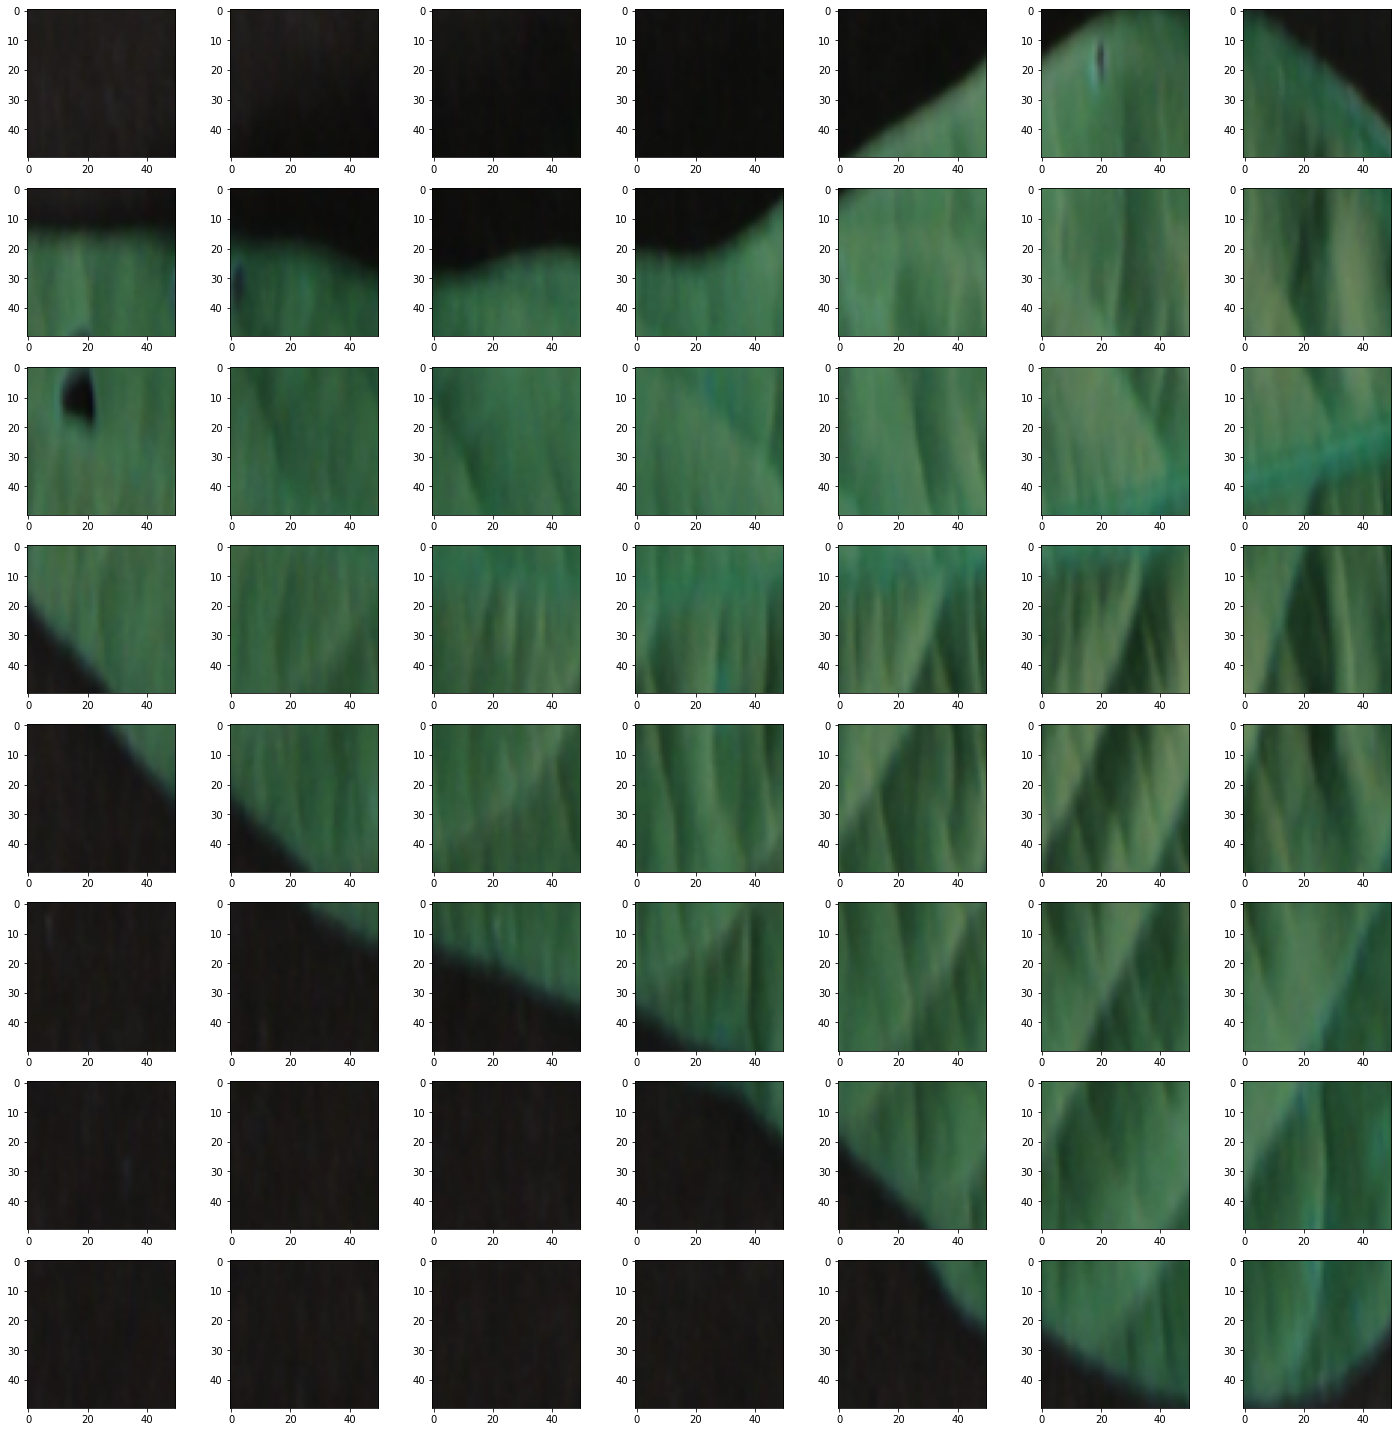

In [85]:
temp = np.load(r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Patches/Patchesof_0.npy')
#plot_patches(temp.squeeze())

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")

Using cuda:0


In [52]:
# Stack the whole dataset
tensor_folder = r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Tensors'
list_o_tensors = []

for i in range(len(list_o_patches)):
    images = []
    temp = np.load(list_o_patches[i])
    temp = rearrange(temp, 'b p h w c -> (b p) h w c')
    imgnum = 'Tensorof_' + str(i) + ".pt"
    new_path = os.path.join(tensor_folder, imgnum)
    list_o_tensors.append(new_path)
    for a in range(0, temp.shape[0]):
        tempds = temp[a]
        torch_temp = torch.from_numpy(tempds)
        images.append(torch_temp)
    images_torch = torch.stack(images, dim = 0).to(device)
    print(images_torch.shape)
    zca = K.enhance.ZCAWhitening(eps=0.1)
    images_zca = zca(images_torch.float(), include_fit = True)
    torch.save(images_zca, new_path)

torch.Size([56, 50, 50, 3])


In [54]:
temp = torch.load(list_o_tensors[0])
temp.shape

torch.Size([56, 50, 50, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

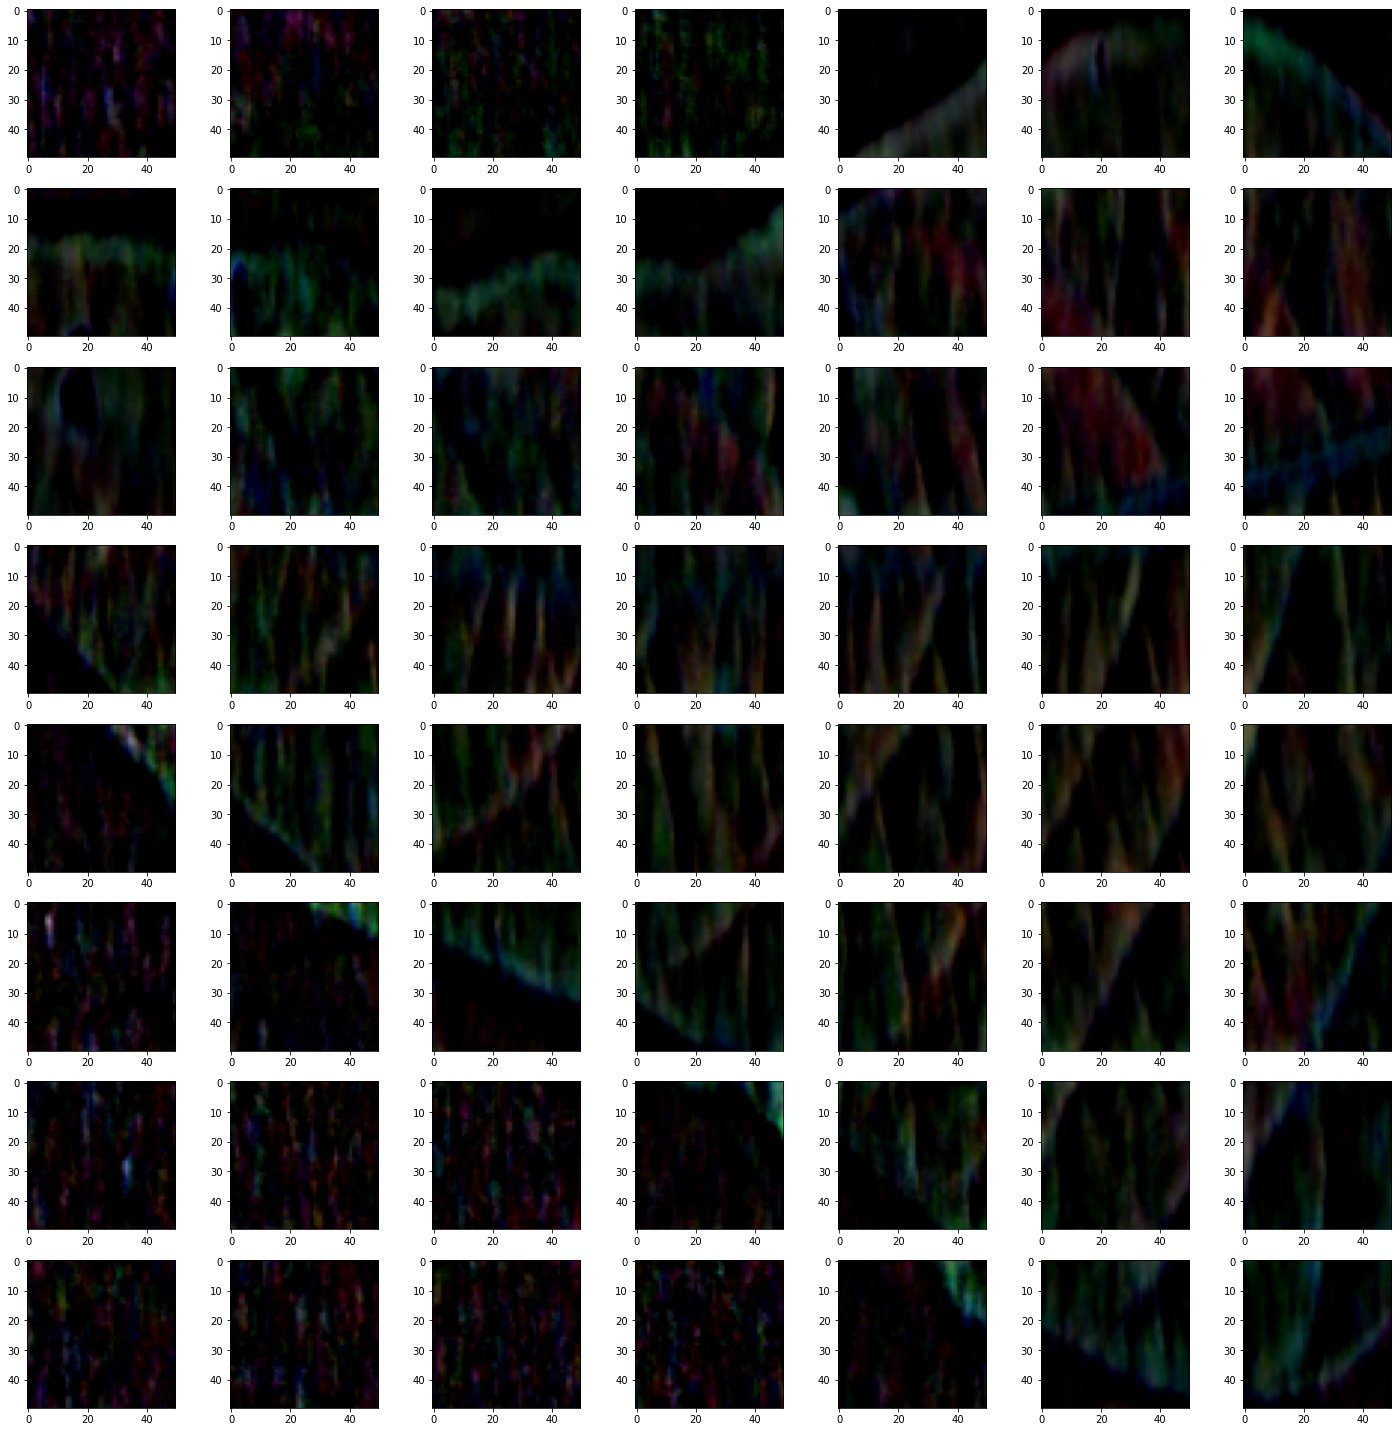

In [63]:
temp = torch.load(r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Tensors/Tensorof_0.pt')
temp = temp.cpu().numpy()
plot_patches(temp.squeeze())

In [61]:
# white_patch_folder = r'/home/exouser/ME592_Spring2023/Assignment2/AgandBio/WhitePatches'
# list_o_white_patches = []

# for i in range(0,len(list_o_tensors)):
#     temp = torch.load(list_o_tensors[i])
#     print(list_o_tensors[i])
#     print(temp.shape[0])
#     for x in range(0,temp.shape[0]):
#         temp_tensor_patch = temp[x]
#         temp_tensor_patch = rearrange(temp_tensor_patch, 'h w c -> c h w')
#         print(temp_tensor_patch.shape)
#         image = Image.fromarray(temp_tensor_patch.permute(1, 2, 0).cpu().numpy().astype('uint8'))
#         file_name = "WhitePatchof_" + str(i) + '_' + str(x) + '.jpg'
#         list_o_white_patches.append(os.path.join(white_patch_folder, file_name))
#         image.save(os.path.join(white_patch_folder, file_name))
#     break

/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Tensors/Tensorof_0.pt
56
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size([3, 50, 50])
torch.Size(

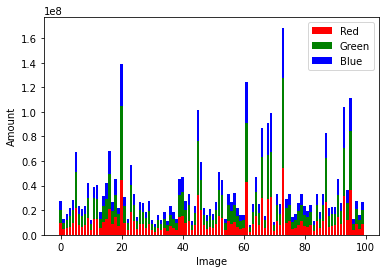

In [45]:
# Folder containing the images
folder_path = "/home/exouser/ME592_Spring2023/Assignment2/AgandBio/AugmentedLeaves"

# List the image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".jpeg")]

# Initialize a list to hold the amounts of red, green, and blue in each image
red_amounts = []
green_amounts = []
blue_amounts = []

# Loop over the images and calculate the amounts of red, green, and blue in each
for file_name in image_files:
    # Open the image and convert it to RGB
    img = Image.open(os.path.join(folder_path, file_name)).convert("RGB")
    # Calculate the amounts of red, green, and blue in the image
    red_amount = sum([pixel[0] for pixel in img.getdata()])
    green_amount = sum([pixel[1] for pixel in img.getdata()])
    blue_amount = sum([pixel[2] for pixel in img.getdata()])
    # Append the amounts to the lists
    red_amounts.append(red_amount)
    green_amounts.append(green_amount)
    blue_amounts.append(blue_amount)

# Create a stacked bar plot of the amounts of red, green, and blue
plt.bar(range(len(image_files)), red_amounts, color="red", label="Red")
plt.bar(range(len(image_files)), green_amounts, bottom=red_amounts, color="green", label="Green")
plt.bar(range(len(image_files)), blue_amounts, bottom=[sum(x) for x in zip(red_amounts, green_amounts)], color="blue", label="Blue")
#plt.xticks(range(len(image_files)), image_files, rotation=45, ha="right")
plt.xlabel("Image")
plt.ylabel("Amount")
plt.legend()
plt.show()

/home/exouser/ME592_Spring2023/Assignment2/AgandBio/Tensors/Tensorof_0.pt


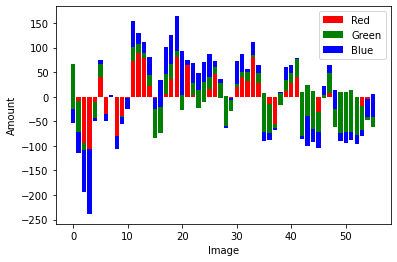

In [91]:
# Define empty lists to store the RGB values
red_vals = []
green_vals = []
blue_vals = []

for i in range(0,len(list_o_tensors)):
    temp = torch.load(list_o_tensors[i])
    print(list_o_tensors[i])
    #print(temp.shape[0])
    for x in range(0,temp.shape[0]):
        temp_tensor_patch = temp[x]
        image_array = temp_tensor_patch.cpu().numpy()
        # extract each channel from the array
        red_channel = image_array[:, :, 0]
        green_channel = image_array[:, :, 1]
        blue_channel = image_array[:, :, 2]
        red_vals.append(sum(sum(red_channel)))
        green_vals.append(sum(sum(green_channel)))
        blue_vals.append(sum(sum(blue_channel)))

# Create a stacked bar plot of the amounts of red, green, and blue
plt.bar(range(len(red_vals)), red_vals, color="red", label="Red")
plt.bar(range(len(red_vals)), green_vals, bottom=red_vals, color="green", label="Green")
plt.bar(range(len(red_vals)), blue_vals, bottom=[sum(x) for x in zip(red_vals, green_vals)], color="blue", label="Blue")
#plt.xticks(range(len(image_files)), image_files, rotation=45, ha="right")
plt.xlabel("Image")
plt.ylabel("Amount")
plt.legend()
plt.show()

In [94]:
#Start on question 2: Image segmentation#
#Approach 1: Using a tutorial from PlantCV and selecting color subchannels#
#Tutorial: https://plantcv.readthedocs.io/en/stable/tutorials/watershed_segmentation_tutorial/
class options:
    def __init__(self):
        self.image = "/home/exouser/ME592_Spring2023/Homework/data/Arabidopsis/1.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.outdir = "."
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 

img, path, filename = pcv.readimage(filename=args.image)


# Convert image from RGB color space to LAB and keep only the 
# lightness channel 

# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ('l' = lightness, 'a' = green-magenta , 'b' = blue-yellow)

a = pcv.rgb2gray_lab(rgb_img=img, channel='l')

# Set a binary threshold on the image 

# Inputs:
#    gray_img    = img object, grayscale
#    threshold   = threshold value (0-255)
#    max_value   = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#       - If object is light then standard thresholding is done
#       - If object is dark then inverse thresholding is done

img_binary = pcv.threshold.binary(gray_img=a, threshold=40, max_value=255, object_type='light')

# Find objects

# Inputs:
#    img  = image that the objects will be overlayed
#    mask = what is used for object detection

id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=img_binary)

# Combine objects 

# Inputs:
#   img       = RGB or grayscale image data for plotting 
#   contours  = Contour list 
#   hierarchy = Contour hierarchy array 

obj, mask = pcv.object_composition(img=img, contours=id_objects, hierarchy=obj_hierarchy)

# Appy mask

# Inputs:
#   img        = RGB or grayscale image data 
#   mask       = Binary mask image data 
#   mask_color = 'white' or 'black' 

masked = pcv.apply_mask(img=img, mask=mask, mask_color="black")

plt.figure(figsize=(15, 15))
plt.imshow(masked)

img2 = masked

NameError: name 'pcv' is not defined

In [ ]:
#Start on question 2: Image segmentation#
#Approach 2: Using a different PlantCV tutorial and selecting saturation subchannels#
#Tutorial: https://plantcv.readthedocs.io/en/latest/tutorials/vis_tutorial/
class options:
    def __init__(self):
        self.image = "/home/exouser/ME592_Spring2023/Homework/data/Arabidopsis/1.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.outdir = "."
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 

img, path, filename = pcv.readimage(filename=args.image)

# Convert RGB to HSV and extract the saturation channel

# Inputs:
#   rgb_image - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

# Take a binary threshold to separate plant from background. 
# Threshold can be on either light or dark objects in the image. 

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than 
#                 the background then standard threshold is done. If the object 
#                 is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=150, max_value=255, object_type='dark')


# Median Blur to clean noise 

# Inputs: 
#   gray_img - Grayscale image data 
#   ksize - Kernel size (integer or tuple), (ksize, ksize) box if integer input,
#           (n, m) box if tuple input 
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=2) #Lower ksize means less blurring, so more similar to previous image step#


# Convert RGB to LAB and extract the lightness channel ('l')

# Input:
#   rgb_img - RGB image data 
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='l')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')


# Join the threshold saturation and lightness images with a logical or operation 

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

# Appy Mask

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

plt.figure(figsize=(8, 8)) #Use so that the displayed image is large enough to view details#
plt.axis('off') #Remove the tickmarks on the axis#
plt.imshow(masked) 

In [95]:
#Approach 3: Threshold off of background color#
#Code adapted from https://stackoverflow.com/questions/64491530/how-to-remove-the-background-from-a-picture-in-opencv-python

img = cv2.imread("/home/exouser/ME592_Spring2023/Assignment2/AgandBio/1.jpg")

hh, ww = img.shape[:2]

# threshold on background color
# Define lower and uppper limits
lower = np.array([0, 0, 255])
upper = np.array([115, 150, 255])

# Create mask to only select black
thresh = cv2.inRange(img, lower, upper)

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert morp image
mask = 255 - morph

# apply mask to image
result = cv2.bitwise_and(img, img, mask=mask)

# save results
cv2.imwrite('Q2_thresh.jpg', thresh)
cv2.imwrite('Q2_morph.jpg', morph)
cv2.imwrite('Q2_mask.jpg', mask)
cv2.imwrite('Q2_result.jpg', result)

True

In [96]:
#Approach 4: Using OpenCV to detect and remove grid lines in the background. Mainly will get the horizontal lines#
#Found this code and modified some from a person trying to remove music scales from the notes#
#https://stackoverflow.com/questions/46274961/removing-horizontal-lines-in-image-opencv-python-matplotlib

image = cv2.imread('/home/exouser/ME592_Spring2023/Homework/data/Arabidopsis/1.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 250, 100, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)

cv2.imshow('thresh', thresh)
cv2.imshow('detected_lines', detected_lines)
cv2.imshow('image', image)
cv2.imshow('result', result)

#plt.figure(figsize=(8, 8))
#plt.imshow(img)
plt.figure(figsize=(5, 5))
plt.imshow(thresh)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.figure(figsize=(15, 15))
plt.imshow(result)

[ WARN:0@7462.510] global /opt/conda/conda-bld/opencv-suite_1664548337286/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/exouser/ME592_Spring2023/Homework/data/Arabidopsis/1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /opt/conda/conda-bld/opencv-suite_1664548337286/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
